In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score, KFold, ShuffleSplit, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [2]:
warnings.filterwarnings('ignore')
data = pd.read_csv('covtype.csv')

In [3]:
x = data.loc[:, 'Elevation' : 'Soil_Type40']
y = data.loc[:, 'Cover_Type']

In [4]:
features_to_remove = ['Hillshade_3pm','Soil_Type7','Soil_Type8',
                     'Soil_Type14','Soil_Type15','Soil_Type21',
                     'Soil_Type25','Soil_Type28','Soil_Type36','Soil_Type37']
x.drop(features_to_remove, axis=1, inplace=True)

In [5]:
x.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,...,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type38,Soil_Type39,Soil_Type40
0,2596,51,3,258,0,510,221,232,6279,1,...,1,0,0,0,0,0,0,0,0,0
1,2590,56,2,212,-6,390,220,235,6225,1,...,1,0,0,0,0,0,0,0,0,0
2,2804,139,9,268,65,3180,234,238,6121,1,...,0,0,0,0,0,0,0,0,0,0
3,2785,155,18,242,118,3090,238,238,6211,1,...,0,1,0,0,0,0,0,0,0,0
4,2595,45,2,153,-1,391,220,234,6172,1,...,1,0,0,0,0,0,0,0,0,0


In [6]:
# Train-test split approach: 80% train, 10% val, 10% test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.125, random_state=0)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

In [8]:
# Cross-validation approach
def cross_validate(classifier, x, y):
    x = np.array(x)
    y = np.array(y)
    kf = KFold(n_splits=10)
    kf.get_n_splits(x)
    for i, (train_index, test_index) in enumerate(kf.split(x)):
        print('Fold {}:'.format(i))
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        classifier.fit(x_train, y_train)
        y_pred = classifier.predict(x_test)
        evaluate_metrics(y_test, y_pred)
        

In [9]:
# Evaluation metrics
def evaluate_metrics(y_test, y_pred):
    print('Accuracy: {}'.format(metrics.accuracy_score(y_test, y_pred)))
    print('Precision: {}'.format(metrics.precision_score(y_test, y_pred.round(), average="macro")))
    print('Recall: {}'.format(metrics.recall_score(y_test, y_pred.round(), average="macro")))
    print('F1-score: {}'.format(metrics.f1_score(y_test, y_pred.round(), average="macro")))
    print('Kappa score: {}'.format(metrics.cohen_kappa_score(y_test, y_pred)))

In [145]:
%%time
# Random Forest train test split
rf = RandomForestClassifier(n_estimators=100, max_depth=15)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
evaluate_metrics(y_test, y_pred)

Accuracy: 0.8377680630615125
Precision: 0.8959127365282116
Recall: 0.713107693872595
F1-score: 0.7648340838463767
Kappa score: 0.7330027075386578
Wall time: 1min 39s


In [146]:
%%time
#Random Forest 10-fold cross-validation
cross_validate(RandomForestClassifier(n_estimators=100, max_depth=15, random_state=101), x_train, y_train)

Fold 0:
Accuracy: 0.8291101719225106
Precision: 0.8903734731397215
Recall: 0.7052141572241044
F1-score: 0.7565466970925836
Kappa score: 0.7186297078606189
Fold 1:
Accuracy: 0.8307356906542235
Precision: 0.8914490416494489
Recall: 0.7156846773111237
F1-score: 0.7637717564102037
Kappa score: 0.7208022282830848
Fold 2:
Accuracy: 0.8332409018760398
Precision: 0.8982843230702561
Recall: 0.7096020746622121
F1-score: 0.763077835294018
Kappa score: 0.7255665223449563
Fold 3:
Accuracy: 0.8307739381537932
Precision: 0.8949843993651302
Recall: 0.7081372695281374
F1-score: 0.7558050781401767
Kappa score: 0.7209871848317171
Fold 4:
Accuracy: 0.8331835306266853
Precision: 0.8959372046250497
Recall: 0.6978528059476093
F1-score: 0.751886215917999
Kappa score: 0.7251723541456092
Fold 5:
Accuracy: 0.8331261593773307
Precision: 0.8997776331734292
Recall: 0.7103059483063224
F1-score: 0.7631871517344545
Kappa score: 0.7265949476794336
Fold 6:
Accuracy: 0.8296456369164866
Precision: 0.8908122271618089
Recal

[[0.92159113 0.90839549 0.89711226 0.90590935 0.90418818 0.9047619
  0.90552687 0.90610059 0.91260279 0.9047619 ]
 [0.89950277 0.89041882 0.89701664 0.89347868 0.89118378 0.89615605
  0.88908013 0.8912794  0.89252247 0.89137502]
 [0.89137502 0.8779244  0.88315165 0.88621151 0.88296041 0.88831517
  0.88181297 0.87715943 0.87881685 0.88455409]
 [0.88372538 0.87516734 0.88123924 0.88042647 0.87043412 0.881048
  0.87253777 0.8805699  0.88224326 0.88119143]
 [0.87431631 0.86880857 0.87592274 0.86834959 0.86888506 0.87347485
  0.87278638 0.87645821 0.87412507 0.86796711]
 [0.87046599 0.86402754 0.86931854 0.8680436  0.86976477 0.87397208
  0.87199592 0.87196405 0.8681711  0.86839421]
 [0.86662295 0.86348114 0.87364424 0.87066634 0.8704751  0.87145862
  0.867907   0.86727864 0.86326257 0.86348114]
 [0.87320711 0.86574871 0.86627462 0.87136642 0.8684739  0.86677663
  0.86620291 0.87256168 0.86995601 0.86770893]
 [0.86984977 0.86247636 0.87429081 0.86838359 0.86341132 0.8671299
  0.86462251 0.8

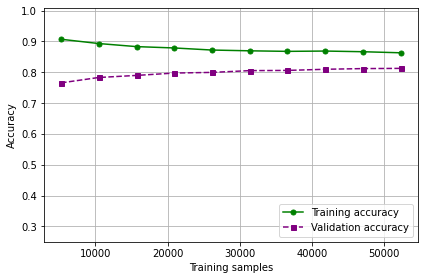

In [144]:
%%time
rf = RandomForestClassifier(n_estimators=100, max_depth=15)
train_sizes, train_scores, test_scores = learning_curve(
    estimator=rf, 
    X=x_test, y=y_test, 
    train_sizes=np.linspace(0.1,1,10), 
    cv=10, n_jobs = -1)

print(train_scores)
print(test_scores)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='green', marker='o',
         markersize=5,label ='Training accuracy')

plt.plot(train_sizes, test_mean, 
         color='purple', linestyle='--',
         marker='s', markersize=5, 
         label='Validation accuracy')
    
plt.grid()
plt.xlabel('Training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.25, 1.01])
plt.tight_layout()
plt.savefig('RandomForest-CV-mean.png', dpi=300)
plt.show()

[[1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.         1.
  0.99996175 1.         1.         1.        ]
 [1.         1.         1.         1.         0.99996813 1.
  1.         1.         0.99996813 1.        ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.         0.99995219
  1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.         1.
  0.99997875 1.         1.         1.        ]
 [1.         0.99998088 1.   

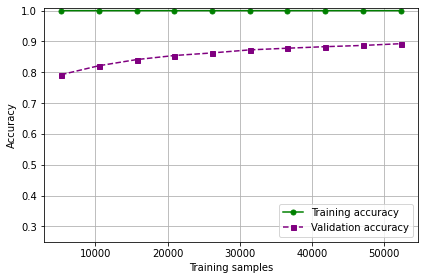

Wall time: 1min 57s


In [156]:
# Random Forest learning curve with no maximum depth set
%%time
rf = RandomForestClassifier(n_estimators=100)
train_sizes, train_scores, test_scores = learning_curve(
    estimator=rf, 
    X=x_test, y=y_test, 
    train_sizes=np.linspace(0.1,1,10), 
    cv=10, n_jobs = -1)

print(train_scores)
print(test_scores)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='green', marker='o',
         markersize=5,label ='Training accuracy')

plt.plot(train_sizes, test_mean, 
         color='purple', linestyle='--',
         marker='s', markersize=5, 
         label='Validation accuracy')
    
plt.grid()
plt.xlabel('Training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.25, 1.01])
plt.tight_layout()
plt.savefig('RandomForest-CV-mean-no_max_depth.png', dpi=300)
plt.show()

In [138]:
%%time
# Decision Tree train test split
dt = DecisionTreeClassifier(max_depth=20)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
evaluate_metrics(y_test, y_pred)

Accuracy: 0.9074558534990189
Precision: 0.8808456508525637
Recall: 0.8255396596589026
F1-score: 0.850471193250642
Kappa score: 0.8500288607640472
Wall time: 6.1 s


In [139]:
%%time
# Decision Tree 10-fold cross validation
cross_validate(DecisionTreeClassifier(max_depth=20), x_train, y_train)

Fold 0:
Accuracy: 0.9086075997781645
Precision: 0.8879212410069297
Recall: 0.8194157461056283
F1-score: 0.8470860540002422
Kappa score: 0.8518576655353086
Fold 1:
Accuracy: 0.9057964085597904
Precision: 0.8762232028542201
Recall: 0.8377496614132395
F1-score: 0.8546629956049993
Kappa score: 0.8472440029747351
Fold 2:
Accuracy: 0.9075940410395671
Precision: 0.8812587414939484
Recall: 0.8352493462050509
F1-score: 0.8559458415456289
Kappa score: 0.8506049481125796
Fold 3:
Accuracy: 0.9101183760111683
Precision: 0.8925882036595418
Recall: 0.8316172285768013
F1-score: 0.8553108330055689
Kappa score: 0.8539039968469362
Fold 4:
Accuracy: 0.9079573922854793
Precision: 0.8807121696275545
Recall: 0.829071738914404
F1-score: 0.8510342368123398
Kappa score: 0.8510563027081901
Fold 5:
Accuracy: 0.9059111510584995
Precision: 0.8855839437909462
Recall: 0.8287034173255615
F1-score: 0.8536687562298652
Kappa score: 0.8482333784312814
Fold 6:
Accuracy: 0.9077661547876308
Precision: 0.8757662592739709
Reca

[[0.96090181 0.96510911 0.96515161 0.96510911 0.96523661 0.96527911
  0.96506662 0.96525786 0.96515161 0.96506662]
 [0.94699489 0.96133782 0.95908545 0.95907483 0.95900046 0.95904295
  0.95901108 0.95893671 0.95900046 0.95900046]
 [0.95116337 0.95386195 0.94665864 0.95600099 0.95590891 0.95596558
  0.95594433 0.95590891 0.955916   0.95598683]
 [0.9506287  0.9503684  0.94389286 0.95203111 0.95485718 0.95490499
  0.9549103  0.95488374 0.95488374 0.95490499]
 [0.95053313 0.94610491 0.94435402 0.9438653  0.94488524 0.94660638
  0.94657663 0.94661913 0.94661488 0.94657663]
 [0.94051443 0.94266054 0.93826562 0.94431439 0.94380443 0.93925368
  0.94581597 0.94577701 0.94579472 0.94576639]
 [0.94331473 0.94276226 0.94354846 0.94490534 0.94744    0.9426712
  0.94391272 0.94448947 0.94447429 0.9444834 ]
 [0.94190361 0.94305635 0.94323962 0.94520246 0.94268715 0.94312541
  0.94087836 0.94233655 0.94179737 0.94180799]
 [0.94544064 0.94361326 0.94126174 0.94437821 0.94431918 0.94436876
  0.94561535 

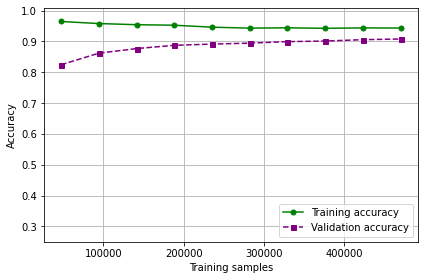

In [137]:
%%time
dt = DecisionTreeClassifier(max_depth=20)

train_sizes, train_scores, test_scores = learning_curve(
    estimator=dt, 
    X=x_train, y=y_train, 
    train_sizes=np.linspace(0.1,1,10), 
    cv=10, n_jobs = -1)

print(train_scores)
print(test_scores)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='green', marker='o',
         markersize=5,label ='Training accuracy')

plt.plot(train_sizes, test_mean, 
         color='purple', linestyle='--',
         marker='s', markersize=5, 
         label='Validation accuracy')

plt.grid()
plt.xlabel('Training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.25, 1.01])
plt.tight_layout()
plt.savefig('DecisionTree-CV-mean.png', dpi=300)

plt.show()

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
[[0.83392936 0.82708305 0.8275229  0.82662408 0.827848   0.82698744
  0.82605037 0.82821136 0.82551491 0.82951177]
 [0.87504542 0.87387887 0.87162227 0.87234897 0.86816087 0.87177526
  0.86990113 0.8704366  0.87097206 0.87129716]
 [0.89164483 0.89212293 0.89240978 0.89045916 0.88858503 0.88900576
  0.89068865 0.89042091 0.89015318 0.89275401]
 [0.90640837 0.90403702 0.90508883 0.90464898 0.90539481 0.90501233
  0.90306171 0.90505058 0.90325295 0.90472548]
 [0.91522442 0.91543478 0.91662045 0.91461246 0.91503318 0.91535828
  0.91558777 0.91510967 0.9162571  0.91600849]
 [0.92296954 0.92268268 0.92281655 0.92142051 0.92254881 0.92168824
  0.9220516  0.92249144 0.

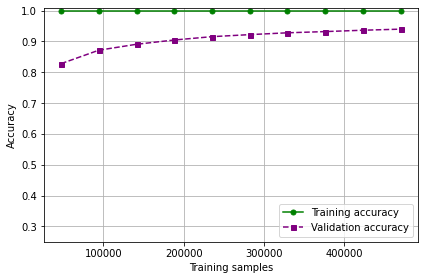

Wall time: 1min 33s


In [155]:
# Decision Tree learning curve with no maximum depth set
%%time
train_sizes, train_scores, test_scores = learning_curve(
    estimator=DecisionTreeClassifier(), 
    X=x_train, y=y_train, 
    train_sizes=np.linspace(0.1,1,10), 
    cv=10, n_jobs = -1)

print(train_scores)
print(test_scores)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='green', marker='o',
         markersize=5,label ='Training accuracy')

plt.plot(train_sizes, test_mean, 
         color='purple', linestyle='--',
         marker='s', markersize=5, 
         label='Validation accuracy')

plt.grid()
plt.xlabel('Training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.25, 1.01])
plt.tight_layout()
plt.savefig('DecisionTree-CV-mean-no_max_depth.png', dpi=300)
plt.show()

In [160]:
x.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31',
       'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35',
       'Soil_Type38', 'Soil_Type39', 'Soil_Type40'],
      dtype='object')

In [10]:
%%time
# Naive Bayes train test split
nb = GaussianNB()
histogram = nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)
y_probs = nb.predict_proba(x_test)
evaluate_metrics(y_test, y_pred)

Accuracy: 0.4538914323086985
Precision: 0.3976481589433238
Recall: 0.5946708755430044
F1-score: 0.3673851316111521
Kappa score: 0.25894401688020063
Wall time: 873 ms


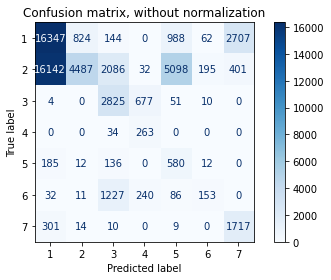

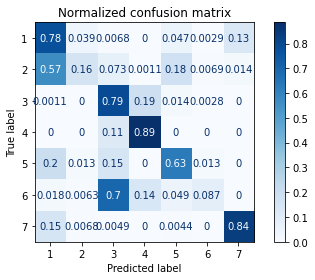

In [12]:
class_names = [1,2,3,4,5,6,7]

disp = metrics.plot_confusion_matrix(nb, x_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion matrix, without normalization')
plt.tight_layout()
plt.savefig('NaiveBayes-ConfusionMatrix.png', dpi=300)
plt.show()


disp = metrics.plot_confusion_matrix(nb, x_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
disp.ax_.set_title('Normalized confusion matrix')
plt.tight_layout()
plt.savefig('NaiveBayes-ConfusionMatrix-normalized.png', dpi=300)
plt.show()


In [152]:
# Naive Bayes 10-fold cross validation
cross_validate(GaussianNB(), x_train, y_train)

Fold 0:
Accuracy: 0.4570384961083169
Precision: 0.39227739936781136
Recall: 0.5916022311001968
F1-score: 0.36308184240752356
Kappa score: 0.260615130853629
Fold 1:
Accuracy: 0.45443766613757625
Precision: 0.3957835057671857
Recall: 0.5950528742195577
F1-score: 0.36188676336935544
Kappa score: 0.2567425695166855
Fold 2:
Accuracy: 0.4575739611022929
Precision: 0.3897745026111651
Recall: 0.5883205426468645
F1-score: 0.3646246106802445
Kappa score: 0.2611951133394753
Fold 3:
Accuracy: 0.45770782735078697
Precision: 0.38948633649715353
Recall: 0.5921011987887381
F1-score: 0.36161949530479065
Kappa score: 0.258947351228243
Fold 4:
Accuracy: 0.45730622860530495
Precision: 0.3950273296115624
Recall: 0.5873642290803952
F1-score: 0.3614743918381369
Kappa score: 0.26037240448906096
Fold 5:
Accuracy: 0.4561970511177832
Precision: 0.39452343361210895
Recall: 0.5846796904599916
F1-score: 0.36318370384174503
Kappa score: 0.26049238052036205
Fold 6:
Accuracy: 0.4554321011263889
Precision: 0.3870478386

[[0.84991681 0.71102102 0.73488746 0.72895909 0.72886348 0.73020214
  0.72987703 0.72934157 0.72991528 0.72991528]
 [0.82953089 0.74279513 0.69334111 0.73594882 0.73601576 0.7366564
  0.73650341 0.73612094 0.73697195 0.73697195]
 [0.75694989 0.7262499  0.69293632 0.67311774 0.73929229 0.73973214
  0.7396174  0.73936879 0.73975126 0.73975126]
 [0.54609302 0.56406456 0.49575931 0.55569314 0.68023178 0.70305119
  0.70293645 0.70277868 0.70346714 0.70346714]
 [0.49271959 0.51901092 0.48209061 0.52575778 0.59746037 0.65479719
  0.55614542 0.55420627 0.55474173 0.55470731]
 [0.49957609 0.51462329 0.48759825 0.525884   0.51841936 0.56723273
  0.63998904 0.54787312 0.5499608  0.54964844]
 [0.47803911 0.46093428 0.4509189  0.4996025  0.51918522 0.49735136
  0.61754686 0.52615992 0.52625008 0.52477482]
 [0.47572718 0.45012526 0.44419451 0.4778284  0.47521323 0.5027084
  0.57027022 0.54862452 0.50154424 0.50473791]
 [0.49534337 0.45263366 0.45873838 0.48388187 0.49020758 0.51241025
  0.58549272 0

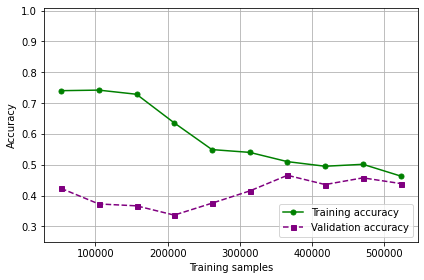

In [151]:
nb = GaussianNB()
train_sizes, train_scores, test_scores = learning_curve(
    estimator=nb, 
    X=x, y=y, 
    train_sizes=np.linspace(0.1,1, 10), 
    cv=10, n_jobs = -1)
print(train_scores)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='green', marker='o',
         markersize = 5,label ='Training accuracy')

plt.plot(train_sizes, test_mean, 
         color='purple', linestyle='--',
         marker='s', markersize=5, 
         label='Validation accuracy')
    
plt.grid()
plt.xlabel('Training samples')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.ylim([0.25, 1.01])
plt.tight_layout()
plt.savefig('NaiveBayes-CV-mean.png', dpi=300)
plt.show()